In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from GetData import *
from scipy.integrate import odeint
from scipy.optimize import curve_fit

c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:142: SettingWithCopyWarning: 
A value is trying

In [2]:
O4_events_BBH.columns

Index(['eventid', 'chirp_mass', 'far', 'mass1', 'mass2', 'snr', 'spin1z',
       'spin2z', 'template_duration', 'likelihood', 'group', 'group_name',
       'chisq', 'total_mass', 'mass_ratio', 'mass_dos',
       'network_matched_filter_snr', 'combined_far', 'M_tot',
       'luminosity_distance', 'luminosity_distance_error'],
      dtype='object')

In [3]:
O3_all.columns

Index(['name', 'simple_name', 'catalog', 'confidence', 'version', 'group_name',
       'group', 'gps', 'far', 'snr', 'network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper', 'mass1', 'mass2', 'chirp_mass',
       'chirp_mass_source_lower', 'chirp_mass_source_upper', 'redshift',
       'redshift_lower', 'redshift_upper', 'luminosity_distance',
       'luminosity_distance_lower', 'luminosity_distance_upper', 'prob',
       'effective_spin', 'total_mass', 'mass_ratio', 'mass_dos', 'is_O1',
       'is_O2', 'is_O3', 'mass_1_source', 'mass_2_source',
       'network_matched_filter_snr', 'chi_eff', 'chirp_mass_source',
       'combined_far', 'p_astro', 'M_tot'],
      dtype='object')

In [4]:
O3_all_predicted.columns

Index(['Unnamed: 0', 'eventid', 'chirp_mass', 'far', 'mass1', 'mass2', 'snr',
       'spin1z', 'spin2z', 'template_duration', 'chisq', 'likelihood', 'group',
       'group_name', 'total_mass', 'mass_ratio', 'mass_dos',
       'luminosity_distance'],
      dtype='object')

Not all variables are available unless we use the "O4_events_BBH" dataset.

$$\Delta E=4\pi\omega d^2_Lt_{dur}\text{SNR}N_{thresh}$$

$$R=(\frac{GM}{\omega^2})^{1/3}$$

$$\.\omega^3=(\frac{96}{5})^3\frac{\omega^{11}}{c^{15}}(G\mathscr{M})^5$$

$$\frac{d}{dt}E_{GW}=\frac{32}{5}\frac{G}{c^5}\mu^2r^4\omega^6$$

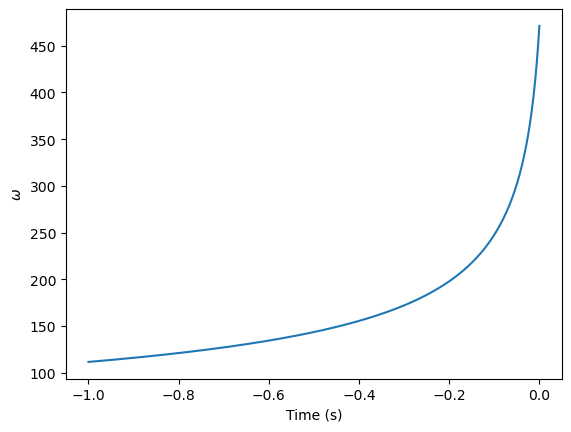

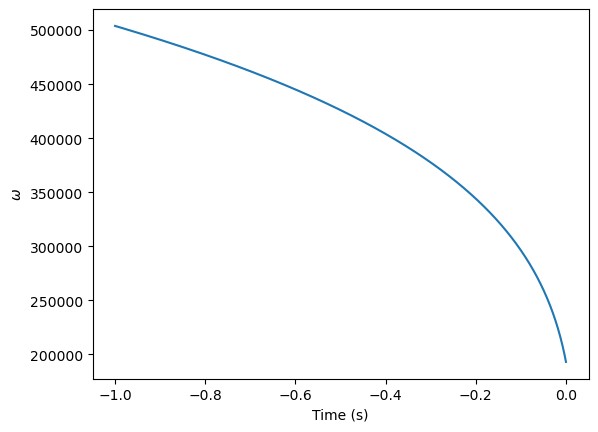

166.21597730233233


In [5]:
def domega(omega, chirp_mass, G, c):
    return (96/5)*((((omega)**11)/(c**15))*((G*chirp_mass)**5))**(1/3)

def f(state,t,chirp_mass,G,c):
    omega = state[0]
    return np.array([domega(omega,chirp_mass,G,c)])

t_temp = 1
t = np.linspace(0,-t_temp,1000)
omegaf = np.array([2*np.pi*75])

G = 6.6743e-11
c = 299792458
chirp_mass = 10*1.989e+30
mass = 12*1.989e+30
res = odeint(f,omegaf,t,args=(chirp_mass,G,c))

plt.plot(t, res[:,0])
plt.ylabel("$\omega$")
plt.xlabel("Time (s)")
plt.show()

plt.plot(t, (G*mass/(res[:,0]**2))**(1/3))
plt.ylabel("$\omega$")
plt.xlabel("Time (s)")
plt.show()

"""plt.figure() # start a new plot.
plt.plot(t, domega(res[:,0],chirp_mass,G,c))
plt.xlabel("Time (s)")
plt.ylabel("$\.\omega$")

plt.figure() # start a new plot.
plt.plot(res[:,0], domega(res[:,0],chirp_mass,G,c))
plt.xlabel("$\omega$")
plt.ylabel("$\.\omega$")
plt.show()"""

def summation(t, values):
    delta = t[1] - t[0]
    return -sum(values*delta)

print(summation(t, res[:,0]))

def effective_energy(chirp_masses,mass1s,mass2s,t_temps,const=1,G = 6.6743e-11,c = 299792458, quality=1000):
    values = []
    omegaf=np.array([2*np.pi*75])
    for chirp_mass, mass1, mass2, t_temp in zip(chirp_masses,mass1s,mass2s,t_temps):
        t = np.linspace(0,-t_temp,quality)
        mass = mass1 + mass2
        res = odeint(f,omegaf,t,args=(chirp_mass,G,c))
        radius = (G*mass/(res[:,0]**2))**(1/3)
        reduced_mass = 1/(1/(mass1)+1/(mass2))
        values.append(const * (32/5) * (G / c**5) * (reduced_mass**2) * summation(t, (radius**4) * (res[:,0]**6)))
    return np.array(values)

In [6]:
#m = 0.8003270810708438
#b = 7.534448682703253
c = 299792458
G = 6.6743e-11
#SNR_scale_factor = 1.6

N_thresh=1e-23
omega=2*np.pi*75
epsilon = 0.04
O4_SNR_scale_factor = 1.6
strain_magnitude = 1e+23

In [7]:
O3_all.columns

Index(['name', 'simple_name', 'catalog', 'confidence', 'version', 'group_name',
       'group', 'gps', 'far', 'snr', 'network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper', 'mass1', 'mass2', 'chirp_mass',
       'chirp_mass_source_lower', 'chirp_mass_source_upper', 'redshift',
       'redshift_lower', 'redshift_upper', 'luminosity_distance',
       'luminosity_distance_lower', 'luminosity_distance_upper', 'prob',
       'effective_spin', 'total_mass', 'mass_ratio', 'mass_dos', 'is_O1',
       'is_O2', 'is_O3', 'mass_1_source', 'mass_2_source',
       'network_matched_filter_snr', 'chi_eff', 'chirp_mass_source',
       'combined_far', 'p_astro', 'M_tot'],
      dtype='object')

In [8]:
sub_df_O3 = O3_all_predicted[(O3_all_predicted["template_duration"]>0) & (O3_all_predicted["luminosity_distance"]>0)]
#sub_df_O3["energy_emission"] = ((c**3)/(4*G))*((sub_df_O3["luminosity_distance"]*sub_df_O3["snr"]*N_thresh*strain_magnitude)**2)*effective_spin(sub_df_O3["chirp_mass"]*1.989e+30,sub_df_O3["template_duration"])
#sub_df_O3["act_energy_emission"] = epsilon*(sub_df_O3["total_mass"]*1.989e+30)*(c**2)

sub_df_O4 = O4_BBH[(O4_BBH["template_duration"]>0) & (O4_BBH["luminosity_distance"]>0) & (O4_BBH["chirp_mass"]<60)]
#sub_df_O4["energy_emission"] = ((c**3)/(4*G))*((sub_df_O4["luminosity_distance"]*O4_SNR_scale_factor*sub_df_O4["snr"]*N_thresh*strain_magnitude)**2)*effective_spin(sub_df_O4["chirp_mass"]*1.989e+30,sub_df_O4["template_duration"])

$$f_{GW}^{-8/3}(t)=\frac{(8\pi)^{8/3}}{5}(\frac{GM}{c^5})^{5/3}(t_c-t)$$

$$\omega_{GW}(t)=\frac{2\pi f_{GW}(t)}{2}$$

$$\int_{t_c-t_{\text{temp}}}^{t_c}\omega_{GW}(t)dt=\frac{5^{3/8}}{8}(\frac{c^5}{GM_{\text{chirp}}})^{5/8}(t_{\text{temp}})^{5/8}$$

$$\Delta E=4\pi\omega d^2_Lt_{dur}\text{SNR}N_{thresh}$$

$$R=(\frac{GM}{\omega^2})^{1/3}$$

$$\.\omega^3=(\frac{96}{5})^3\frac{\omega^{11}}{c^{15}}(G\mathscr{M})^5$$

In [9]:
def luminosity_model(data, const):
    mass1, mass2 = data
    reduced_mass = 1/(1/(mass1*1.989e+30)+1/(mass2*1.989e+30))
    total_mass = (mass1 + mass2) *1.989e+30
    radius = (G * total_mass / (omega**2)) ** (1/3)
    return const * (32/5) * (G / c**5) * (reduced_mass**2) * (radius**4) * (omega**6)

omega=2*np.pi*75
luminosities = ((c**3)/(4*G))*((omega*sub_df_O4["luminosity_distance"]*O4_SNR_scale_factor*sub_df_O4["snr"]*N_thresh*strain_magnitude)**2)
new_luminosities=luminosity_model((sub_df_O4["mass1"], sub_df_O4["mass2"]), 1)
const = curve_fit(luminosity_model, (sub_df_O4["mass1"], sub_df_O4["mass2"]), (luminosities), p0=[1.0])[0][0]
print(const)

0.25474063880856335


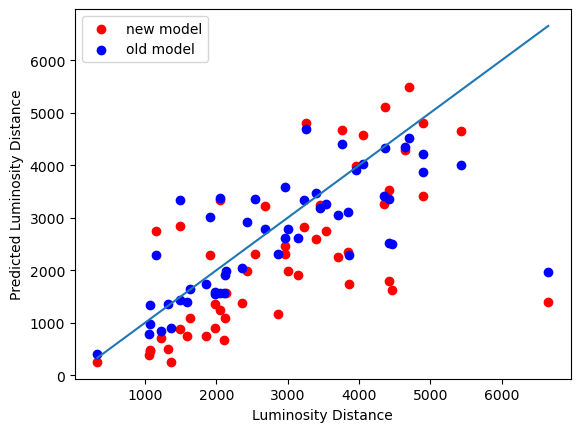

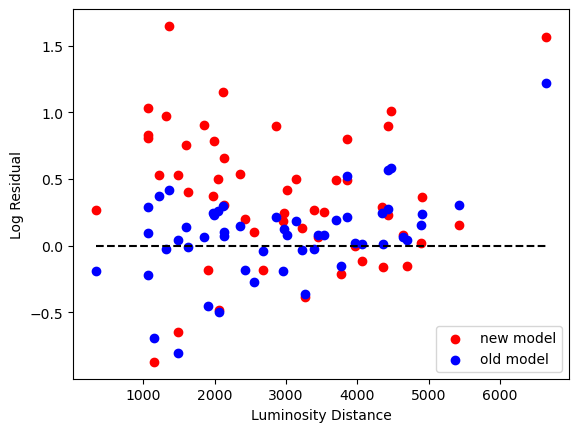

In [10]:
def luminosity_distance_model(data, const):
    mass1, mass2, snr = data
    reduced_mass = 1/(1/(mass1*1.989e+30)+1/(mass2*1.989e+30))
    total_mass = (mass1 + mass2) *1.989e+30
    radius = (G * total_mass / (omega**2)) ** (1/3)
    return np.sqrt(const * (4*32/5) * (G**2 / c**8) * (reduced_mass**2) * (radius**4) * (omega**4)) / (O4_SNR_scale_factor * snr * N_thresh * strain_magnitude)

def old_luminosity_distance_model(data):
    m = 0.8003270810708438
    b = 7.534448682703253
    chirp_mass, snr = data
    return np.exp(b) * (chirp_mass ** m) / (O4_SNR_scale_factor * snr)

luminosity_distance = luminosity_distance_model((sub_df_O4["mass1"], sub_df_O4["mass2"], sub_df_O4["snr"]), const)
old_luminosity_distance = old_luminosity_distance_model((sub_df_O4["chirp_mass"], sub_df_O4["snr"]))

plt.scatter(sub_df_O4["luminosity_distance"], luminosity_distance, c="red", label="new model")
plt.scatter(sub_df_O4["luminosity_distance"], old_luminosity_distance, c="blue", label="old model")
plt.legend()
plt.xlabel("Luminosity Distance")
plt.ylabel("Predicted Luminosity Distance")
plt.plot([np.min(sub_df_O4["luminosity_distance"]), np.max(sub_df_O4["luminosity_distance"])], [np.min(sub_df_O4["luminosity_distance"]), np.max(sub_df_O4["luminosity_distance"])])
plt.show()

plt.scatter(sub_df_O4["luminosity_distance"], np.log(sub_df_O4["luminosity_distance"]) - np.log(luminosity_distance), c="red", label="new model")
plt.scatter(sub_df_O4["luminosity_distance"], np.log(sub_df_O4["luminosity_distance"]) - np.log(old_luminosity_distance), c="blue", label="old model")
plt.legend()
plt.xlabel("Luminosity Distance")
plt.ylabel("Log Residual")
plt.plot([np.min(sub_df_O4["luminosity_distance"]), np.max(sub_df_O4["luminosity_distance"])], [0, 0], color="black", linestyle="--")
plt.show()

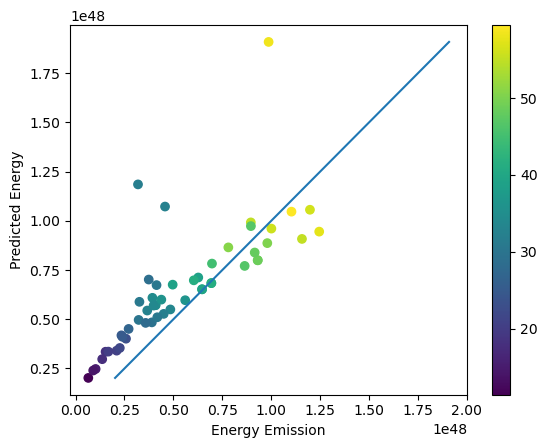

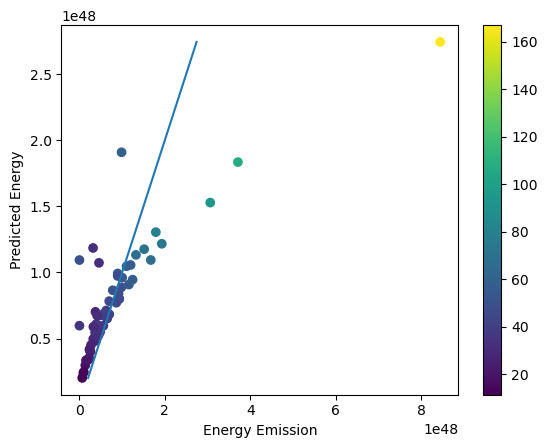

In [11]:
epsilon = 0.04
energy = effective_energy(sub_df_O4["chirp_mass"]*1.989e+30, sub_df_O4["mass1"]*1.989e+30, sub_df_O4["mass2"]*1.989e+30, sub_df_O4["template_duration"], const=1, quality=100000)
energy_emission = epsilon*(sub_df_O4["total_mass"]*1.989e+30)*(c**2)
plt.scatter(energy, energy_emission, c=sub_df_O4["chirp_mass"])
plt.colorbar()
plt.xlabel("Energy Emission")
plt.ylabel("Predicted Energy")
plt.plot([np.min(energy_emission), np.max(energy_emission)], [np.min(energy_emission), np.max(energy_emission)])
plt.show()

energy = effective_energy(O4_BBH["chirp_mass"]*1.989e+30, O4_BBH["mass1"]*1.989e+30, O4_BBH["mass2"]*1.989e+30, O4_BBH["template_duration"], const=1, quality=100000)
energy_emission = epsilon*(O4_BBH["total_mass"]*1.989e+30)*(c**2)
plt.scatter(energy, energy_emission, c=O4_BBH["chirp_mass"])
plt.colorbar()
plt.xlabel("Energy Emission")
plt.ylabel("Predicted Energy")
plt.plot([np.min(energy_emission), np.max(energy_emission)], [np.min(energy_emission), np.max(energy_emission)])
plt.show()

In [12]:
def epsilon_energy_model(total_mass, epsilon, c=299792458):
    return epsilon*(total_mass)*(c**2)

energy = effective_energy(sub_df_O4["chirp_mass"]*1.989e+30, sub_df_O4["mass1"]*1.989e+30, sub_df_O4["mass2"]*1.989e+30, sub_df_O4["template_duration"], const=1, quality=100000)
epsilon = np.abs(curve_fit(epsilon_energy_model, (sub_df_O4["total_mass"]*1.989e+30), (energy), p0=[0.04])[0][0])
print(epsilon)

0.03281314354204892


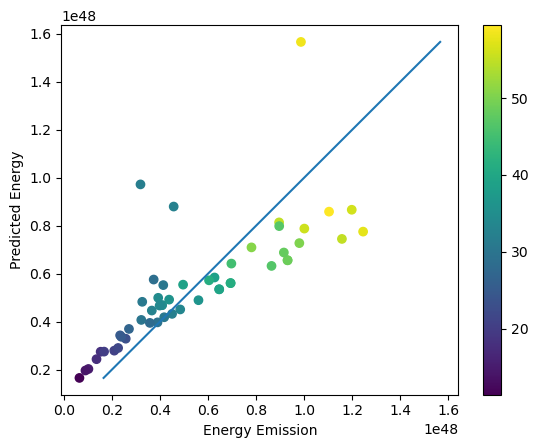

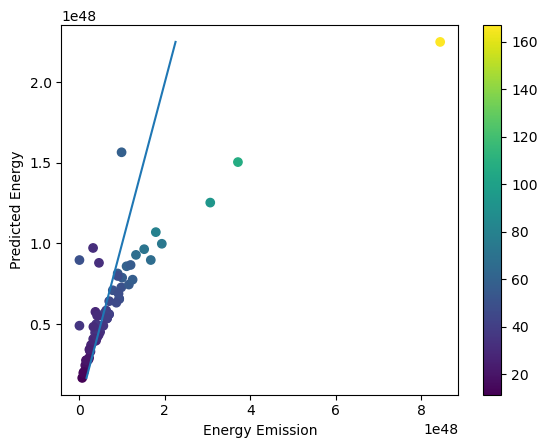

In [13]:
energy = effective_energy(sub_df_O4["chirp_mass"]*1.989e+30, sub_df_O4["mass1"]*1.989e+30, sub_df_O4["mass2"]*1.989e+30, sub_df_O4["template_duration"], const=1, quality=100000)
energy_emission = epsilon_energy_model(sub_df_O4["total_mass"]*1.989e+30, epsilon)
plt.scatter(energy, energy_emission, c=sub_df_O4["chirp_mass"])
plt.colorbar()
plt.xlabel("Energy Emission")
plt.ylabel("Predicted Energy")
plt.plot([np.min(energy_emission), np.max(energy_emission)], [np.min(energy_emission), np.max(energy_emission)])
plt.show()

energy = effective_energy(O4_BBH["chirp_mass"]*1.989e+30, O4_BBH["mass1"]*1.989e+30, O4_BBH["mass2"]*1.989e+30, O4_BBH["template_duration"], const=1, quality=100000)
energy_emission = epsilon_energy_model(O4_BBH["total_mass"]*1.989e+30, epsilon)
plt.scatter(energy, energy_emission, c=O4_BBH["chirp_mass"])
plt.xlabel("Energy Emission")
plt.ylabel("Predicted Energy")
plt.colorbar()
plt.plot([np.min(energy_emission), np.max(energy_emission)], [np.min(energy_emission), np.max(energy_emission)])
plt.show()